Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[c("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

# 1.Import necessary libraries

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

# 2.Import Data

In [9]:
toyo=pd.read_csv(filepath_or_buffer='ToyotaCorolla (1).csv', encoding='latin1')
toyo

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


# 3.Data Understanding

## 3.1 Data Analysis

In [10]:
toyo.shape

(1436, 38)

In [11]:
toyo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [12]:
toyo.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

### Considering only given Columns

In [13]:
toyo1=pd.concat([toyo.iloc[:,2:4],toyo.iloc[:,6:7],toyo.iloc[:,8:9],toyo.iloc[:,12:14],toyo.iloc[:,15:18]],axis=1)
toyo1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [14]:
toyo2= toyo1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)
toyo2

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [15]:
toyo2[toyo2.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [16]:
toyo3=toyo2.drop_duplicates().reset_index(drop=True)
toyo3

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [17]:
toyo3.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [18]:
toyo3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
QT,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


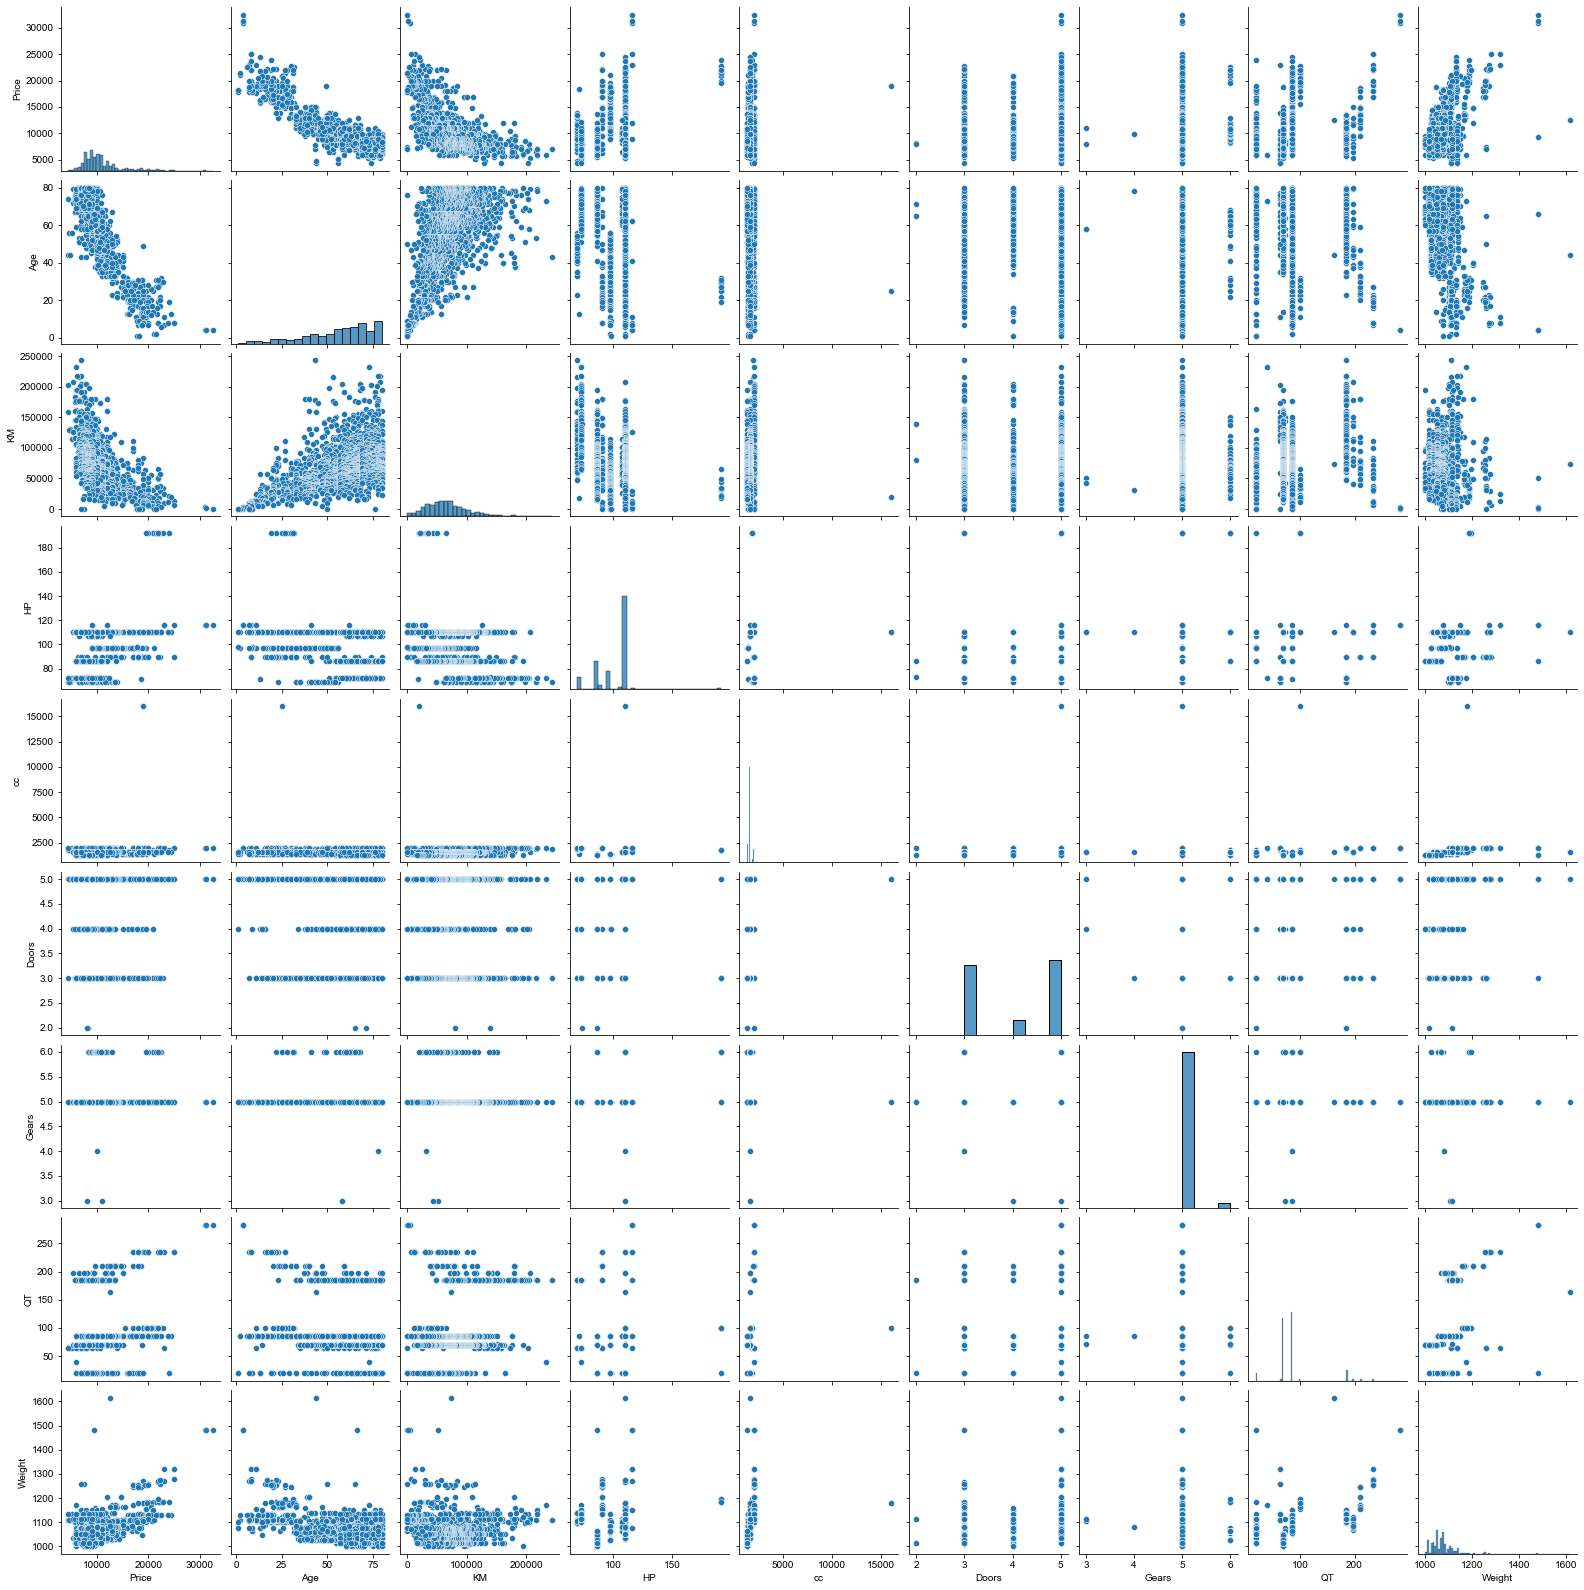

In [19]:
sns.pairplot(toyo3)
sns.set_theme( style='darkgrid')

# 4.Model Building

In [20]:
import statsmodels.formula.api as smf

In [21]:
model=smf.ols(formula='Price~Age+KM+HP+cc+Doors+Gears+QT+Weight', data=toyo3).fit()
model

# 5.Model Testing

In [22]:
#Finding Intercepts And Coefficients
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
QT              3.858805
Weight         16.855470
dtype: float64

In [23]:
#Finding p-values, t-values
round(model.pvalues,5) , model.tvalues

(Intercept    0.00011
 Age          0.00000
 KM           0.00000
 HP           0.00000
 cc           0.18824
 Doors        0.98164
 Gears        0.00245
 QT           0.00329
 Weight       0.00000
 dtype: float64,
 Intercept    -3.875273
 Age         -46.551876
 KM          -16.552424
 HP           11.209719
 cc           -1.316436
 Doors        -0.023012
 Gears         3.034563
 QT            2.944198
 Weight       15.760663
 dtype: float64)

In [24]:
#As p- values of cc & Doors are greater than (>5) there is no significance / insignificant values

In [25]:
#Finding Rsquared values
model.rsquared , model.rsquared_adj           # model accuracy is 86.17%

(0.8625200256947, 0.8617487495415146)

**Build SLR & MLR for CC & Doors**

**And also p-values, t-values**

In [26]:
slr_c=smf.ols(formula='Price~ cc', data=toyo3).fit()
round(slr_c.pvalues,8) , slr_c.tvalues #CC has significant p-value

(Intercept    0.000000
 cc           0.000002
 dtype: float64,
 Intercept    24.879592
 cc            4.745039
 dtype: float64)

In [27]:
slr_d=smf.ols('Price~Doors', data=toyo3).fit()
round(slr_d.pvalues,8) ,slr_d.tvalues   #Doors has significant p-value

(Intercept    0.0
 Doors        0.0
 dtype: float64,
 Intercept    19.421546
 Doors         7.070520
 dtype: float64)

In [28]:
slr_cd=smf.ols('Price~cc+Doors', data= toyo3).fit()
round(slr_cd.pvalues,5) , slr_cd.tvalues       #cc and Doors have significant p-values

(Intercept    0.00000
 cc           0.00002
 Doors        0.00000
 dtype: float64,
 Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64)

# 6.Model Validation Techniques

## 6.1 Technique-1 Collinearity Check

In [29]:
#If VIF is greater than 10 then variables are said to be collinear
#Checking collinearity for all independent variables

In [30]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+QT+Weight', data=toyo3).fit().rsquared
vif_age = 1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_cc=smf.ols('cc~Age+KM+HP+Doors+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_cc=1/(1-rsq_cc)

rsq_DR=smf.ols('Doors~Age+KM+HP+cc+Gears+QT+Weight',data=toyo3).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_GR=smf.ols('Gears~Age+KM+HP+cc+Doors+QT+Weight',data=toyo3).fit().rsquared
vif_GR=1/(1-rsq_GR)

rsq_QT=smf.ols('QT~Age+KM+HP+cc+Doors+Gears+Weight',data=toyo3).fit().rsquared
vif_QT=1/(1-rsq_QT)

rsq_WT=smf.ols('Weight~Age+KM+HP+cc+Doors+Gears+QT',data=toyo3).fit().rsquared
vif_WT=1/(1-rsq_WT)
 
pd.DataFrame({'Variables':['Age','KM','HP','cc','Doors','Gears','QT','Weight'], 
              'VIF' : [vif_age,vif_KM,vif_HP,vif_cc,vif_DR,vif_GR,vif_QT,vif_WT]})

,Variables,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,QT,2.295375
7,Weight,2.487180


In [31]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

## 6.2 Technique-2 Residual analysis

### Test for normality of residuals using QQ plot 

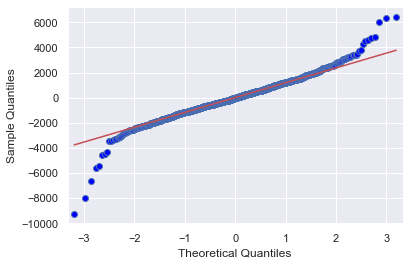

In [32]:
sm.qqplot(model.resid, line='q')
plt.show()

### Inference:
**As we can see that some of the data points are not lieing on the straight line, so we detect the outliers**

In [33]:
#Outliers detection from the above qq plot
np.where(model.resid>6000)

(array([109, 146, 522], dtype=int64),)

In [34]:
np.where(model.resid<-6000)

(array([220, 600, 959], dtype=int64),)

In [35]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

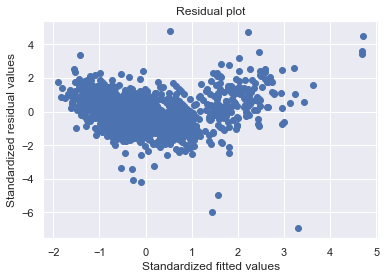

In [36]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Test for ERRORS/RESIDUALS vs REGRESSOR/INDEPENDENT variable 'x' / PREDICTORS

using residual regression plots code graphics.plot_regress_exog(model,x,fig)

where, exog= x-variable, endog= y-variable

In [37]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

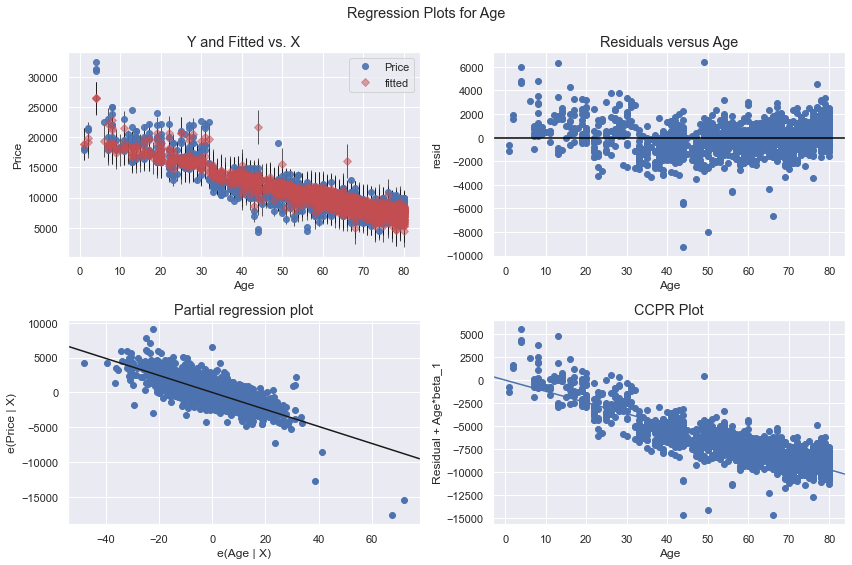

In [38]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

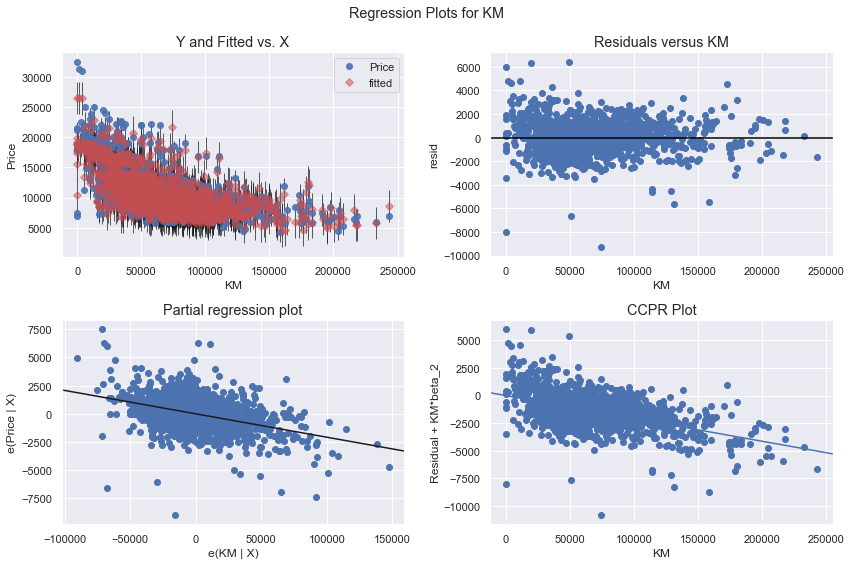

In [39]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

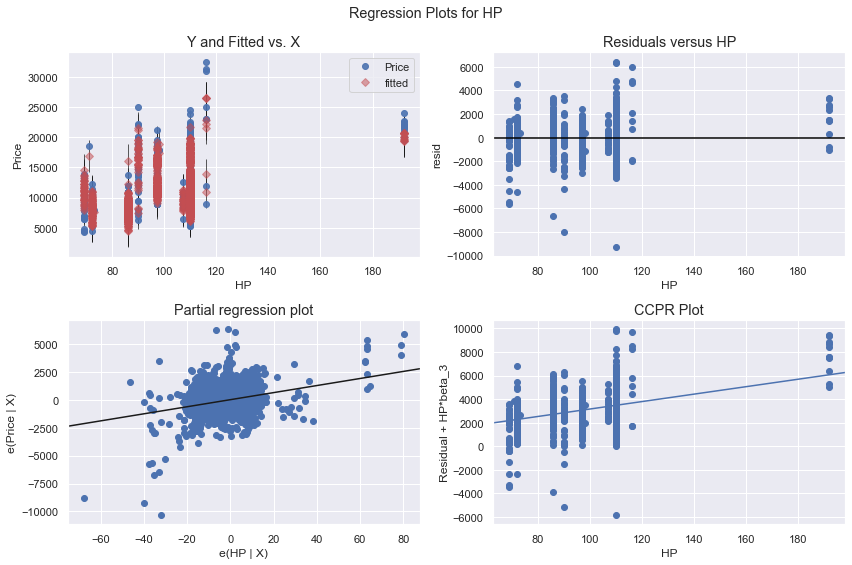

In [40]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

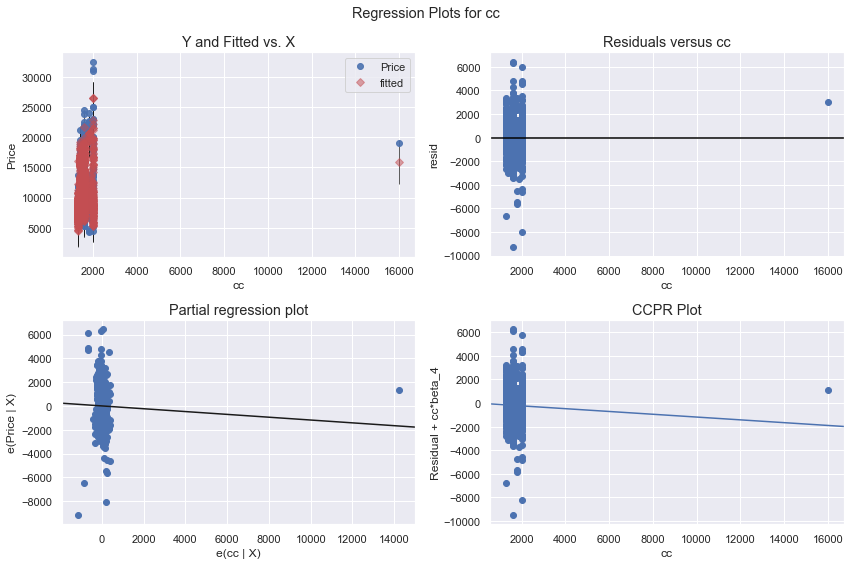

In [41]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

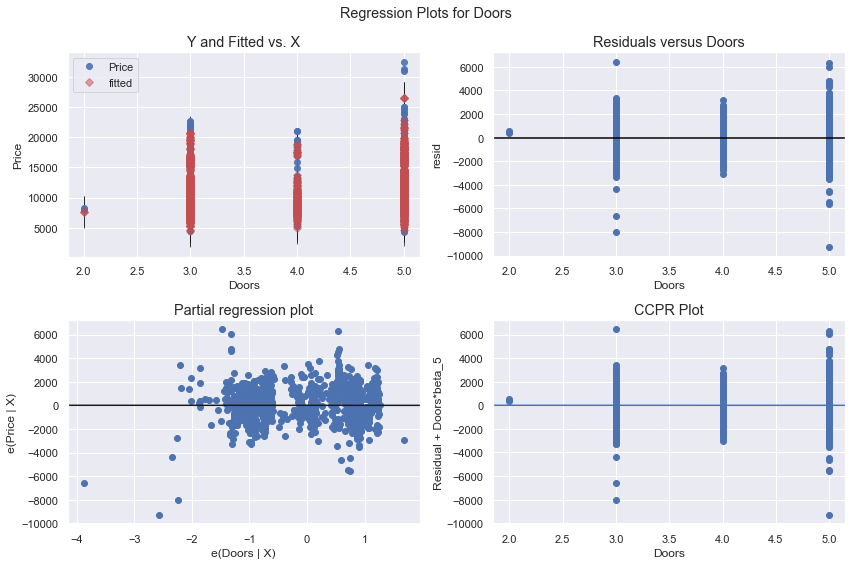

In [42]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

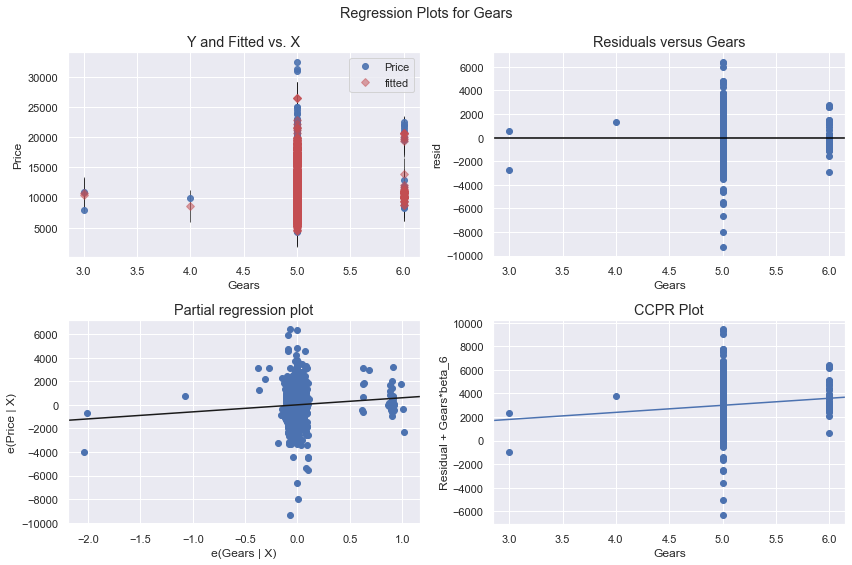

In [43]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

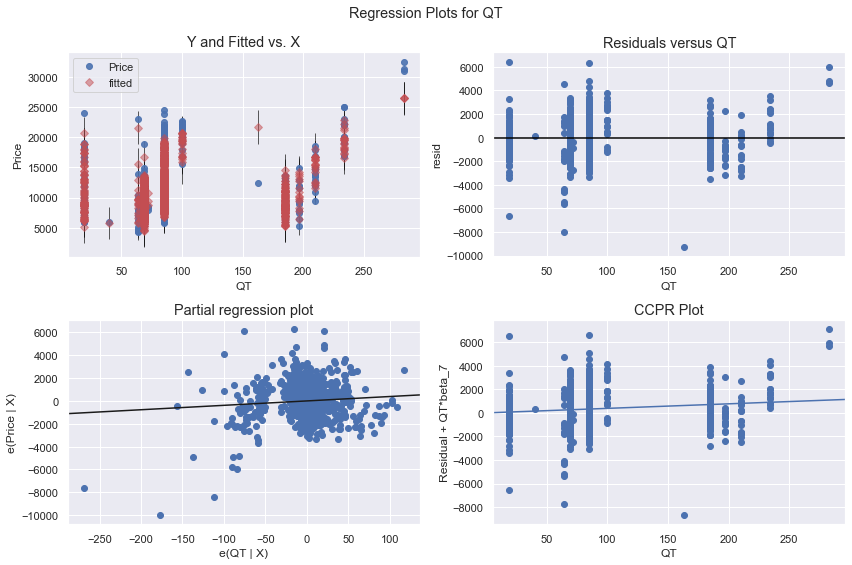

In [44]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'QT',fig=fig)
plt.show()

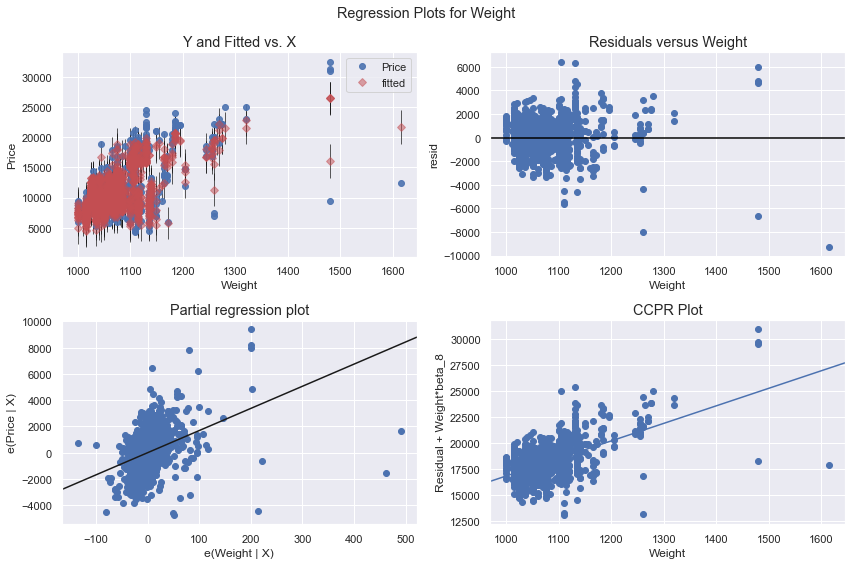

In [45]:
fig=plt.figure(figsize=(12,8))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

# Inference:
**From the above graphs we can estimate how dependent variable(price) changes as the independent variables changes!!**

## 7. Model Deletion Diagnostics(Checking outliers & Influencers)

### 7.1 Technique-1 Cooks Distance

In [46]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

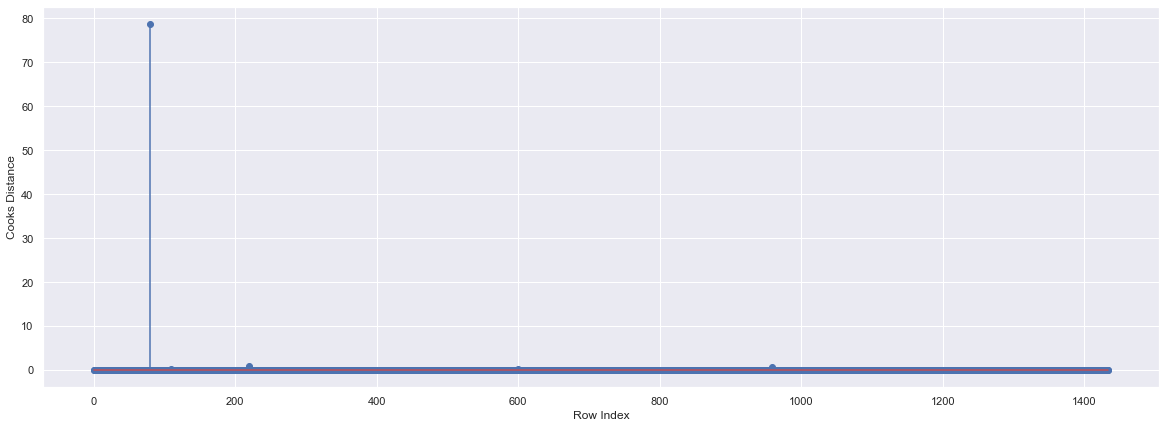

In [47]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyo3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [48]:
np.argmax(c) , np.max(c)   #index and value of influencer where c>0.05

(80, 78.72950582248232)

# Inference:
**We can observe that 80th data point is an outlier from the cooks Distance Analysis.**

### 7.2 Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers

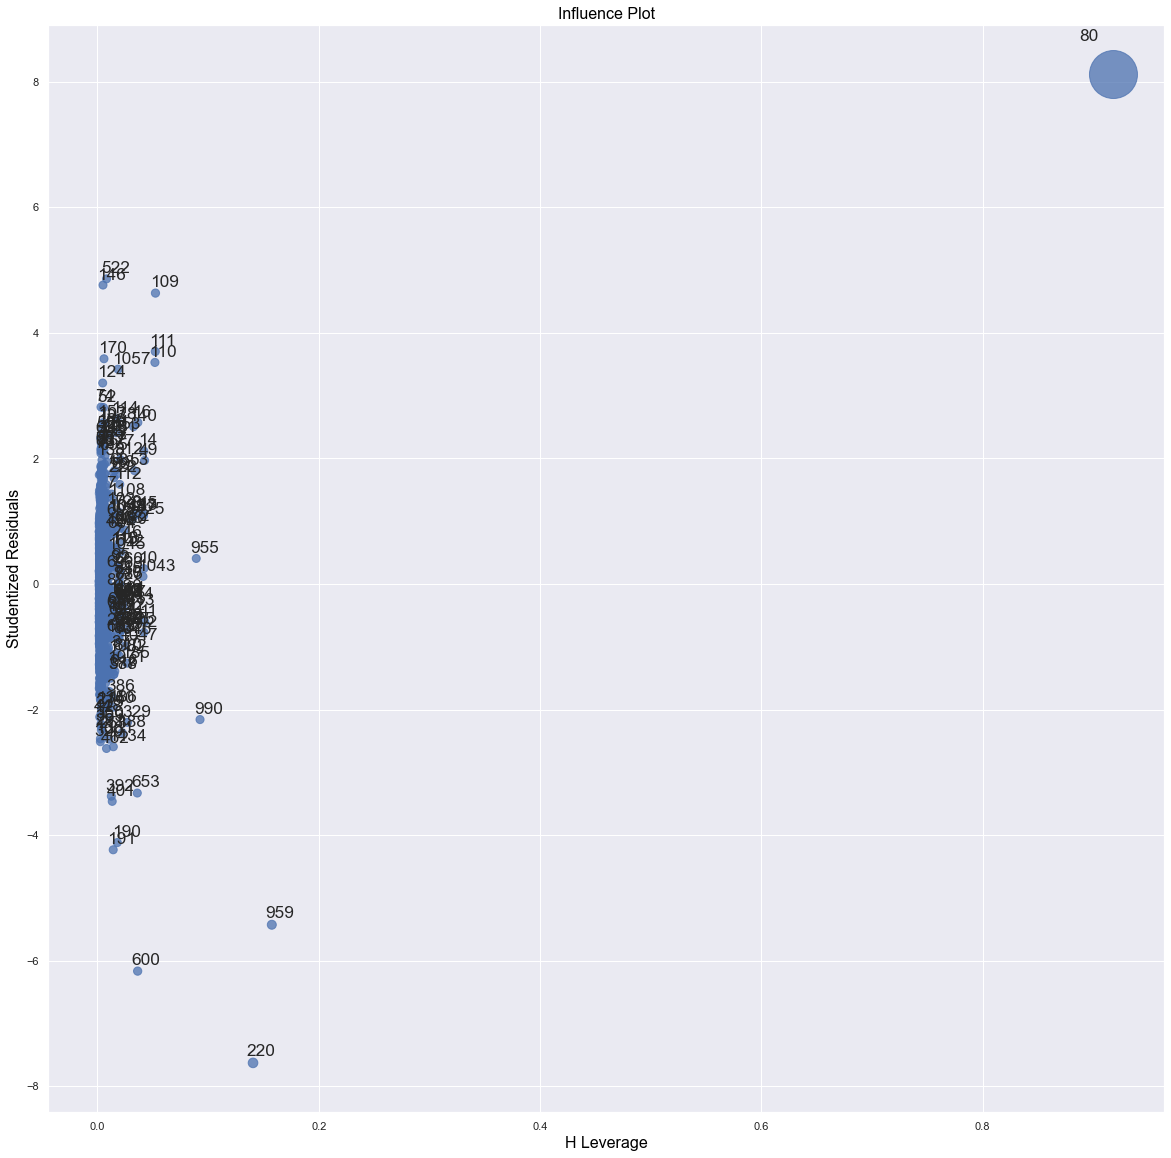

In [49]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(model,ax = ax)

# Inference:
**We can observe that 80th data point is an outlier from the Leverage Analysis**

In [50]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=toyo3.shape[1]
n=toyo3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [51]:
toyo3[toyo3.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
80,18950,25,20019,110,16000,5,5,100,1180


## Improving the model

In [52]:
# Creating a copy of data so that original dataset is not affected
toyo_new=toyo3.copy()
toyo_new

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [53]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
toyo4=toyo_new.drop(toyo_new.index[[80]],axis=0).reset_index(drop=True)
toyo4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Model Deletion Diagnostics and Final Model

In [54]:
 while np.max(c)>0.5 :
    model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyo4).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    toyo4=toyo4.drop(toyo4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    toyo4
else:
    final_model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+QT+Weight',data=toyo4).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882395145171204


In [55]:
#Model accuracy has increased from 81.14% to 88.82%

In [59]:
final_model.rsquared

0.8882395145171204

In [60]:
toyo4

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


## Model Predictions

In [73]:
##1
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"cc":1300,"Doors":4,"Gears":5,"QT":69,"Weight":1012},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,12,40000,80,1300,4,5,69,1012


In [74]:
# Manual Prediction of Price
final_model.predict(new_data)

0    14341.570181
dtype: float64

In [75]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(new_data)
pred_y

0    14341.570181
dtype: float64

In [76]:
##2
new_data=pd.DataFrame({'Age':14,"KM":70000,"HP":90,"cc":1400,"Doors":5,"Gears":4,"QT":50,"Weight":9000},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,14,70000,90,1400,5,4,50,9000


In [77]:
final_model.predict(new_data)

0    269554.407478
dtype: float64

In [78]:
# Automatic Prediction 
pred_y=final_model.predict(new_data)
pred_y

0    269554.407478
dtype: float64

In [87]:
##3
new_data=pd.DataFrame({'Age':30,"KM":5000,"HP":100,"cc":9000,"Doors":4,"Gears":6,"QT":50,"Weight":8000},index=[0])
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,30,5000,100,9000,4,6,50,8000


In [88]:
final_model.predict(new_data)

0    210270.18878
dtype: float64

In [89]:
# Automatic Prediction 
pred_y=final_model.predict(new_data)
pred_y

0    210270.18878
dtype: float64

# Infernce:
**So the model has predicted after droping the data points that are influencing.**